<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/Cat_vs_Dog_With_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-07 17:10:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.96.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   138MB/s    in 0.5s    

2021-05-07 17:10:30 (138 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.682.jpg', 'cat.843.jpg', 'cat.158.jpg', 'cat.870.jpg', 'cat.519.jpg', 'cat.355.jpg', 'cat.315.jpg', 'cat.652.jpg', 'cat.69.jpg', 'cat.33.jpg']
['dog.783.jpg', 'dog.297.jpg', 'dog.174.jpg', 'dog.907.jpg', 'dog.981.jpg', 'dog.345.jpg', 'dog.352.jpg', 'dog.694.jpg', 'dog.45.jpg', 'dog.656.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameter for image. it will be 4x4
nrows = 4
ncols = 4

pic_index = 0

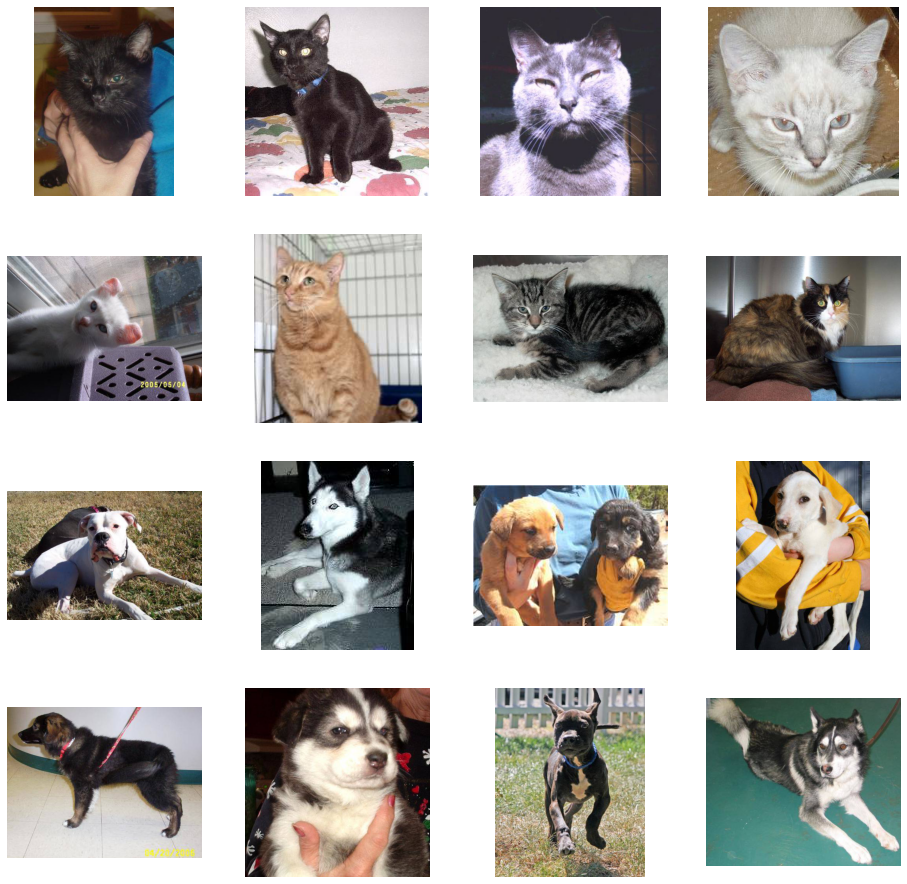

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]
]
next_dog_pic = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]
]

for i, img_path in enumerate(next_cat_pix+next_dog_pic):
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Now for the NN model

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
# Check current model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
# Setting data generator that will real our file

# Normalize data
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow the training dataset from directory
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150,150))
# Flow the validation dataset
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Now to train our model

history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=100,epochs=15, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 39s - loss: 0.7857 - accuracy: 0.5885 - val_loss: 0.7045 - val_accuracy: 0.5150
Epoch 2/15
100/100 - 38s - loss: 0.6152 - accuracy: 0.6800 - val_loss: 0.6558 - val_accuracy: 0.6390
Epoch 3/15
100/100 - 38s - loss: 0.5371 - accuracy: 0.7275 - val_loss: 0.6409 - val_accuracy: 0.6080
Epoch 4/15
100/100 - 38s - loss: 0.4652 - accuracy: 0.7805 - val_loss: 0.6161 - val_accuracy: 0.6680
Epoch 5/15
100/100 - 38s - loss: 0.3849 - accuracy: 0.8300 - val_loss: 0.5774 - val_accuracy: 0.7230
Epoch 6/15
100/100 - 38s - loss: 0.3064 - accuracy: 0.8755 - val_loss: 0.7757 - val_accuracy: 0.6540
Epoch 7/15
100/100 - 38s - loss: 0.2316 - accuracy: 0.8960 - val_loss: 0.7464 - val_accuracy: 0.7040
Epoch 8/15
100/100 - 38s - loss: 0.1764 - accuracy: 0.9310 - val_loss: 1.0590 - val_accuracy: 0.6580
Epoch 9/15
100/100 - 38s - loss: 0.1179 - accuracy: 0.9525 - val_loss: 0.8402 - val_accuracy: 0.7280
Epoch 10/15
100/100 - 38s - loss: 0.0923 - accuracy: 0.9675 - val_loss: 1.0146 - val_accura

In [ ]:
# This is the script to input our image to test the model

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' +fn
  img = image.load_img(path, target_size=(150,150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn+' is a dog')  
  else:
    print(fn+' is a cat')

Saving cat_fk.jpeg to cat_fk.jpeg
[0.]
cat_fk.jpeg is a cat


<function matplotlib.pyplot.figure>

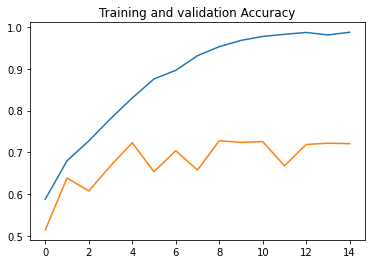

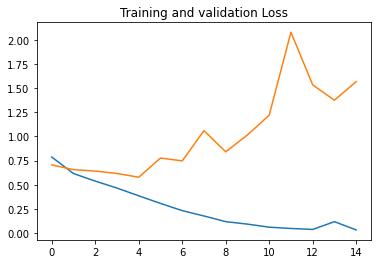

In [ ]:
# Evaluate Loss and accuracy

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

# Plot accuracy
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation Accuracy')
plt.figure()

# Plot Loss
plt.plot (epochs, loss)
plt.plot (epochs, val_loss)
plt.title('Training and validation Loss')
plt.figure

In [ ]:
#Now, the same file added augmentation

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Directory with our cat and dog picture
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

#Directory with cat/dog validation picture
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [ ]:
#The model
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = (150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
#Now, the imagedatagenerator also give variety to the image (turning, rotate, etc)
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range =0.2,
    height_shift_range =0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
#Flow training data in batch of 20
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

#Flow validation/dev image
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100, #2000 images=batch size *steps
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 78s - loss: 0.6925 - accuracy: 0.5190 - val_loss: 0.6762 - val_accuracy: 0.5210
Epoch 2/100
100/100 - 77s - loss: 0.6816 - accuracy: 0.5550 - val_loss: 0.6625 - val_accuracy: 0.5640
Epoch 3/100
100/100 - 77s - loss: 0.6597 - accuracy: 0.6030 - val_loss: 0.6557 - val_accuracy: 0.5870
Epoch 4/100
100/100 - 77s - loss: 0.6533 - accuracy: 0.6130 - val_loss: 0.6056 - val_accuracy: 0.6800
Epoch 5/100
100/100 - 77s - loss: 0.6383 - accuracy: 0.6310 - val_loss: 0.6506 - val_accuracy: 0.6120
Epoch 6/100
100/100 - 77s - loss: 0.6190 - accuracy: 0.6530 - val_loss: 0.5991 - val_accuracy: 0.6700
Epoch 7/100
100/100 - 77s - loss: 0.6080 - accuracy: 0.6785 - val_loss: 0.5594 - val_accuracy: 0.7150
Epoch 8/100
100/100 - 77s - loss: 0.6014 - accuracy: 0.6750 - val_loss: 0.5635 - val_accuracy: 0.7040
Epoch 9/100
100/100 - 77s - loss: 0.5860 - accuracy: 0.6885 - val_loss: 0.5462 - val_accuracy: 0.710

In [ ]:
#Now plot the new result

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainig Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 

plt.show()